Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords

#Importing Stop Words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Google Colab/training.1600000.processed.noemoticon.csv',
                 encoding='latin1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

df.head(10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


Converting Sentiment Labels

In [ ]:
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

df['target'].value_counts()


,count
target,
0,800000
1,800000


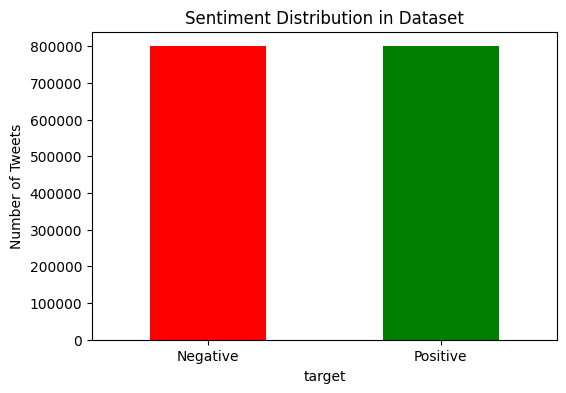

In [ ]:
import matplotlib.pyplot as plt
class_counts = df['target'].value_counts()
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution in Dataset')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.ylabel('Number of Tweets')
plt.show()


Preprocessing the Text Data

In [ ]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


df['text'] = df['text'].apply(preprocess_text)

df.head(25)


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats bummer shoulda got david...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save re...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving im mad cant see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,kwesidei whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,loltrish hey long time see yes rains bit bit l...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,tatianak nope didnt
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,twittera que muera


Spliting the text data into Training and Testing

In [ ]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Converting into Numerical Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Traning the Model

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec , y_train)

MultinomialNB()

Prediction and Evaluation

In [ ]:
y_pred = model.predict(X_test_vec)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.75783125
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76    159494
           1       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



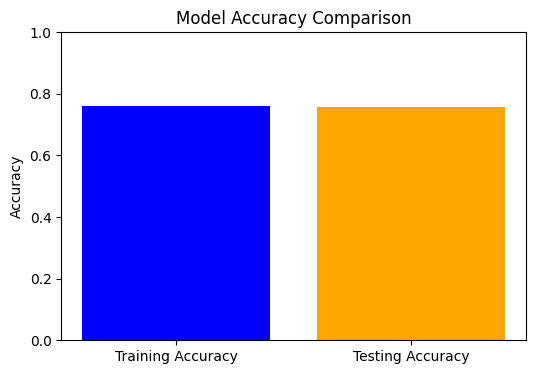

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = model.score(X_train_vec, y_train)
test_accuracy = model.score(X_test_vec, y_test)

plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


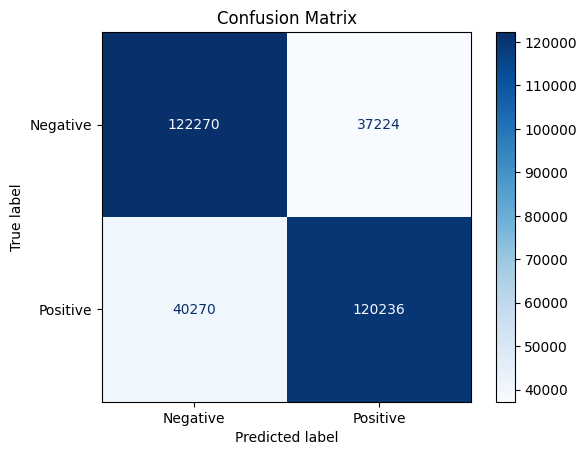

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [ ]:
train_predictions = model.predict(X_train_vec)
print("Training Accuracy:", accuracy_score(y_train, train_predictions))

test_predictions = model.predict(X_test_vec)
print("Testing Accuracy:", accuracy_score(y_test, test_predictions))


Training Accuracy: 0.75923125
Testing Accuracy: 0.75783125


In [ ]:
def predict_sentiment_fixed(text):
    processed_text = preprocess_text(text)
    text_vector = vectorizer.transform([processed_text])
    prediction = model.predict(text_vector)
    return 'Negative' if prediction[0] == 0 else 'Positive'

examples = [
    "I have done",
    "nothing",
    "Amazing quality, totally worth it!",
    "world is a better place everyday."
]

for example in examples:
    print(f"Text: {example}\nPredicted Sentiment: {predict_sentiment_fixed(example)}\n")


Text: I have done
Predicted Sentiment: Positive

Text: Anaysha is a very very good Girl
Predicted Sentiment: Positive

Text: Amazing quality, totally worth it!
Predicted Sentiment: Positive

Text: world is a better place everyday.
Predicted Sentiment: Positive

